In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
#Reading the data
data = pd.read_csv("lineardata.csv",delimiter=',')
#Adding buffer column to ease the computation
data.insert(0,"buffer",[1]*len(data["x"]))
#Seperating x and y
x = data[["buffer","x"]]
y = data["y"]
m,n = x.shape
y = np.array(y).reshape((m,1))
x = np.array(x)
print(x[:5,:])
print(y[:5])

[[  1.  73.]
 [  1.  99.]
 [  1. 137.]
 [  1. 161.]
 [  1. 204.]]
[[742.]
 [661.]
 [687.]
 [624.]
 [649.]]


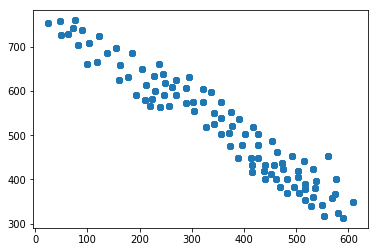

In [24]:
#Printing the Actual Data
plt.scatter(x[:,1],y)

In [25]:
#Normalizing the data
mxx=[]
for i in range(n):
    mxx.append(x[:,i].max())
    x[:,i] = x[:,i]/x[:,i].max()
mxy = y.max()
y = y/mxy
print(x[:5,:])
print(y[:5,:])

[[1.         0.12006579]
 [1.         0.16282895]
 [1.         0.22532895]
 [1.         0.26480263]
 [1.         0.33552632]]
[[0.97631579]
 [0.86973684]
 [0.90394737]
 [0.82105263]
 [0.85394737]]


In [26]:
#Defining a cost function
def cost(X, y, theta):
    return ((1/(len(X)))*(((X.dot(theta)-y)**2).sum()))*mxy

In [27]:
alpha = 0.1
num_iters = 100000
temp = np.zeros((n,1))
theta = np.random.random(size=(n,1)).reshape((n,1))
for i in range(num_iters):
    for j in range(n):
        temp[j,0] = theta[j,0] - (alpha/m)*(((x.dot(theta)-y)*(x[:,j].reshape((m,1)))).sum())
    theta = temp

In [28]:
#Getting the predicted values
y_predict = x.dot(theta)*mxy
print(y_predict[:5])

[[731.81527656]
 [712.11265708]
 [683.3165209 ]
 [665.12948753]
 [632.54438607]]


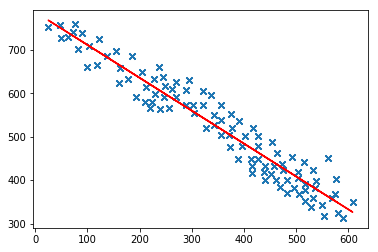

In [29]:
#plotting the graph
plt.scatter(x[:,1]*mxx[1],y*mxy,marker='x')
plt.plot(x[:,1]*mxx[1],y_predict,color='r')

In [30]:
#Mean error of the Hypothesis function
cost(x,y,theta)

1.4834041067204908